In [1]:
import pandas
import matplotlib as mpl
import xarray as xr
import numpy as np
import datetime as dt
dir_cmc='F:/data/sst/cmc/CMC0.2deg/v2/'
dir_cmc_clim='F:/data/sst/cmc/CMC0.2deg/v2/climatology/'
def cmc_filename(d):
    dir_cmc='F:/data/sst/cmc/CMC0.2deg/v2/'
    syr=str(d.year).zfill(4)
    smon=str(d.month).zfill(2)
    sdym=str(d.day).zfill(2)
    sjdy=str(idyjl).zfill(3)
    fname_tem=syr + smon + sdym + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
    cmc_filename = dir_cmc + syr + '/' + sjdy + '/' + fname_tem
    return cmc_filename

In [ ]:
#make cmc monthly average ssts
for lyr in range(1992,2017): #2017):
    ds_mnth=[]
    for imon in range(1,13):
        init = 0
        for idyjl in range(1,366):
            d = dt.date(lyr,1,1) + dt.timedelta(idyjl - 1)
            if d.month!=imon:
                continue
            cmc_filename = cmc_filename(d)
            #print(cmc_filename)
            ds = xr.open_dataset(cmc_filename,drop_variables=['analysis_error','sea_ice_fraction'])
            ds_masked = ds.where(ds['mask'] == 1.) 
            ds.close()
            ds_masked['sq_sst']=ds_masked.analysed_sst**2
            if init==0:
                ds_sum = ds_masked
                init = 1
            else:
                ds_sum = xr.concat([ds_sum,ds_masked],dim = 'time')
            print(idyjl,ds_sum.dims)
        ds_sum = ds_sum.mean('time',skipna=True)
        ds_mnth.append(ds_sum)
    combined = xr.concat(ds_mnth, dim='time')
    fname_tem='monthly/' + syr + 'monthly_average_' + syr + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
    cmc_filename_out = dir_cmc + syr + fname_tem
    combined.to_netcdf(cmc_filename_out)
    

In [ ]:
#make cmc climatology from monthly files
init = 0
for lyr in range(1992,2005): #2018): 
    fname_tem='monthly/' + str(lyr) + 'monthly_average_' + str(lyr) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
    cmc_filename_out = dir_cmc + fname_tem
    ds = xr.open_dataset(cmc_filename_out)
    ds_masked = ds.where(ds['mask'] == 1.) 
    if init==0:
        ds_sum = ds_masked
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds_masked],dim = 'time')
    print(lyr,ds_sum.dims)
ds_sum = ds_sum.mean('time',skipna=True)
fname_tem='monthly/monthly_climatology_1992_2004_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
cmc_filename_out = dir_cmc + fname_tem
ds_sum.to_netcdf(cmc_filename_out)
init = 0
for lyr in range(2005,2018): #2018): 
    fname_tem='monthly/' + str(lyr) + 'monthly_average_' + str(lyr) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
    cmc_filename_out = dir_cmc + fname_tem
    ds = xr.open_dataset(cmc_filename_out)
    ds_masked = ds.where(ds['mask'] == 1.) 
    if init==0:
        ds_sum = ds_masked
        init = 1
    else:
        ds_sum = xr.concat([ds_sum,ds_masked],dim = 'time')
    print(lyr,ds_sum.dims)
ds_sum = ds_sum.mean('time',skipna=True)
fname_tem='monthly/monthly_climatology_2005_2017_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
cmc_filename_out = dir_cmc + fname_tem
ds_sum.to_netcdf(cmc_filename_out)
    

In [8]:
fname_tem=dir_cmc + 'monthly/monthly_climatology_1992_2004_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
print(fname_tem)
ds = xr.open_dataset(fname_tem)
ds_masked = ds.where(ds['mask'] == 1.) 
ds.close()
fname_tem=dir_cmc + 'monthly/monthly_climatology_2005_2017_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
print(fname_tem)
ds = xr.open_dataset(fname_tem)
ds_masked2 = ds.where(ds['mask'] == 1.) 
#ds_sum = xr.concat([ds_masked2,ds_masked],dim = 'time')
ds.close()
ds_ave = .5* (ds_masked + ds_masked)
#ds_sum = ds_sum.mean('time',skipna=True)
fname_tem=dir_cmc + 'monthly/monthly_climatology_1992_2017_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
print(fname_tem)
ds_ave.to_netcdf(fname_tem)


F:/data/sst/cmc/CMC0.2deg/v2/monthly/monthly_climatology_1992_2004_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc
F:/data/sst/cmc/CMC0.2deg/v2/monthly/monthly_climatology_2005_2017_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc
F:/data/sst/cmc/CMC0.2deg/v2/monthly/monthly_climatology_1992_2017_120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc


In [ ]:
#testing nan in arrays
lyr,idyjl=2017,10
d = dt.date(lyr,1,1) + dt.timedelta(idyjl - 1)
cmc_filename = cmc_filename(d)
print(cmc_filename)
ds = xr.open_dataset(cmc_filename,drop_variables=['analysis_error','sea_ice_fraction'])
ds_masked = ds.where(ds['mask'] == 1.) 
ds.close()
ds_masked.analysed_sst[0,0]

In [ ]:
lyr=2002
fname_tem='monthly/' + str(lyr) + 'monthly_average_' + str(lyr) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
cmc_filename_out = dir_cmc + fname_tem
ds = xr.open_dataset(cmc_filename_out)
ds_masked = ds.where(ds['mask'] == 1.) 
print(ds.analysed_sst[0,0],ds_masked.analysed_sst[0,0])
ds.close()

In [ ]:
#testing
ds_ave = .5* (ds_masked + ds_masked)

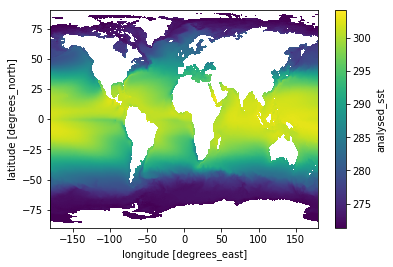

In [6]:
ds_ave.analysed_sst.plot()

In [4]:
ds_ave

<xarray.Dataset>
Dimensions:       (lat: 901, lon: 1800)
Coordinates:
  * lat           (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.4 89.6 89.8 90.0
  * lon           (lon) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
Data variables:
    analysed_sst  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    mask          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    sq_sst        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan